<h1>***PCA DE FORMA PRIMITIVA***<h1>

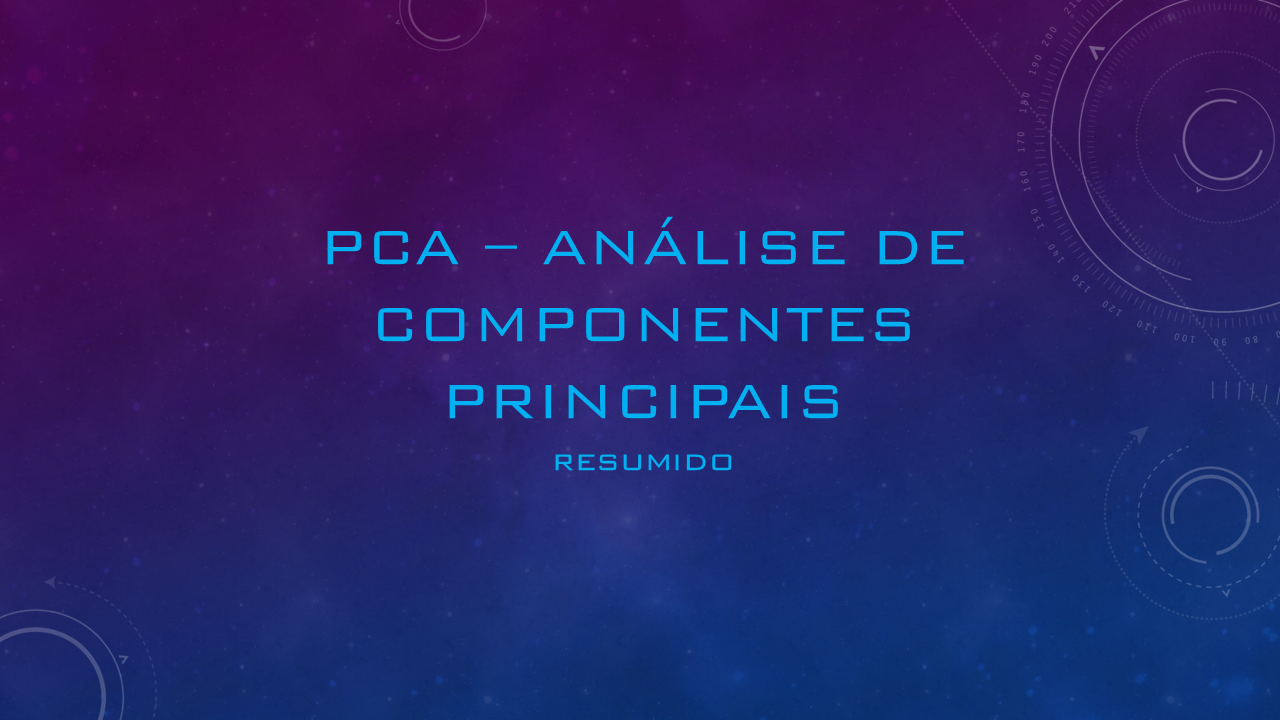

In [10]:
from IPython.display import Image
Image(r'C:\Users\joaov\OneDrive\Documentos\Material Estatística\Principal Componente Análise\PCA-PARA-APL\Slide1.png')

<h3>IMPORTAÇÃO DE BBT<h3>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h3>CRIAÇÃO DE DADOS<h3>

In [12]:

#Data frame para estudo

Local=['nascente','nascente','nascente','nascente','area rural','area rural','area rural','area rural','area urbana','area urbana','area urbana','area urbana']
pH=[4.5,3.5,4.5,3.5,5.8,5.5,5,4.5,6.5,7,6.8,6]
N=[1.2,1.3,1.2,1.3,1.2,1.1,1.3,1.2,2.1,1.8,1.5,1.5]
Oxigen=[0.5,0.5,0.6,0.7,0.5,0.4,0.5,0.3,0.4,0.5,0.5,0.4]
MatOrg=[5.5,5.2,5.3,5.4,5.2,5.4,5.5,5.8,8.2,8.3,8.4,8.5]

dataraiz=pd.DataFrame()
dataraiz['pH']=pH
dataraiz['N']=N
dataraiz['Oxigen']=Oxigen
dataraiz['MatOrg']=MatOrg

dataraiz

,pH,N,Oxigen,MatOrg
0,4.5,1.2,0.5,5.5
1,3.5,1.3,0.5,5.2
2,4.5,1.2,0.6,5.3
3,3.5,1.3,0.7,5.4
4,5.8,1.2,0.5,5.2
5,5.5,1.1,0.4,5.4
6,5.0,1.3,0.5,5.5
7,4.5,1.2,0.3,5.8
8,6.5,2.1,0.4,8.2
9,7.0,1.8,0.5,8.3


<h3>NORMALIZAÇÃO DE VALORES POR SKLEARN<h3>

In [13]:
#Normalização dos Valores será feita por Biblioteca

from sklearn.preprocessing import StandardScaler

model=StandardScaler()
model.fit(dataraiz)
df=pd.DataFrame(model.transform(dataraiz),columns=dataraiz.columns)
df

,pH,N,Oxigen,MatOrg
0,-0.660270,-0.681500,0.169031,-0.639504
1,-1.530956,-0.325935,0.169031,-0.854665
2,-0.660270,-0.681500,1.183216,-0.782945
3,-1.530956,-0.325935,2.197401,-0.711225
4,0.471622,-0.681500,0.169031,-0.854665
5,0.210416,-1.037065,-0.845154,-0.711225
6,-0.224927,-0.325935,0.169031,-0.639504
7,-0.660270,-0.681500,-1.859339,-0.424344
8,1.081102,2.518588,-0.845154,1.296939
9,1.516445,1.451892,0.169031,1.368659


<h3>MATRIZ DE COVARIANCIA, CALCULO DE AUTOVALORES E AUTOVETORES<h3>

In [14]:
# não usaremos sklearn

#criar matriz de covariancia
#neste caso queremos uma matriz onde as linhas representem as variaveis, assim, cabe fazer  a transposta (.T)

covariancia=np.cov(df.T)
covariancia


array([[ 1.09090909,  0.68835925, -0.40004245,  0.87230034],
       [ 0.68835925,  1.09090909, -0.16937697,  0.8807569 ],
       [-0.40004245, -0.16937697,  1.09090909, -0.31850199],
       [ 0.87230034,  0.8807569 , -0.31850199,  1.09090909]])

In [15]:
#encontrar os autovalores e autovetores
from numpy import linalg

autovalores,autovetores=linalg.eig(covariancia)

autovalores=autovalores.T

In [16]:
autovetores   #OS AUTOVETORES ESTÃO NAS COLUNAS graças a covariancia=np.cov(df.T)

array([[ 0.55215973,  0.4043946 ,  0.72861699, -0.02649384],
       [ 0.52811835,  0.44691671, -0.63582204,  0.34217947],
       [-0.27854924, -0.01762671,  0.25454076,  0.92590962],
       [ 0.58191147, -0.79775921,  0.00752429,  0.15780578]])

In [17]:
#são 4 variáveis, logo, 4 componentes/4 autovetores, 4 autovalores
#atenção, eles não estão em ordem!
#veja:

datavetor=pd.DataFrame(autovetores.T,index='componente1 componente2 componente3 componente4'.split(), columns=dataraiz.columns)

datavetor['autovalor']=autovalores

datavetor

,pH,N,Oxigen,MatOrg,autovalor
componente1,0.552160,0.528118,-0.278549,0.581911,2.870409
componente2,0.404395,0.446917,-0.017627,-0.797759,0.148278
componente3,0.728617,-0.635822,0.254541,0.007524,0.359472
componente4,-0.026494,0.342179,0.925910,0.157806,0.985478


In [18]:
#para ajustarmos a ordem, basta levar em conta o os maiores autovalores
datavetor.sort_values(by='autovalor',inplace=True,ascending=False)
datavetor

,pH,N,Oxigen,MatOrg,autovalor
componente1,0.552160,0.528118,-0.278549,0.581911,2.870409
componente4,-0.026494,0.342179,0.925910,0.157806,0.985478
componente3,0.728617,-0.635822,0.254541,0.007524,0.359472
componente2,0.404395,0.446917,-0.017627,-0.797759,0.148278


In [19]:
#podemos ainda representar o quanto o componente representa a variação
somaautovalor=autovalores.sum()
colunanova=[]
for valor in datavetor['autovalor'].values.tolist():
    colunanova.append((valor/somaautovalor)*100)
    
datavetor['% de dados representados']=colunanova
    
colunanova=[]
for valor in range(0,len(autovalores)):
    if valor==0:
        colunanova.append(datavetor.iloc[0,5])
    else:
        colunanova.append(float(datavetor.iloc[valor,5])+colunanova[valor-1])

datavetor['% de dados representados acumulada']=colunanova


datavetor

,pH,N,Oxigen,MatOrg,autovalor,% de dados representados,% de dados representados acumulada
componente1,0.552160,0.528118,-0.278549,0.581911,2.870409,65.780209,65.780209
componente4,-0.026494,0.342179,0.925910,0.157806,0.985478,22.583860,88.364069
componente3,0.728617,-0.635822,0.254541,0.007524,0.359472,8.237895,96.601963
componente2,0.404395,0.446917,-0.017627,-0.797759,0.148278,3.398037,100.000000


<h3>PROJEÇÃO DADOS MULTIPLICANDO POR AUTOVETORES E CRIAÇÃO DE GRÁFICO DE DISPERSÃO COM COMPONENTES<h3>

<h2>PLOTAGEM SEM CARGAS==SEM LOADINGS, APENAS DIREÇÃO IMPORTA<h2>

Text(0, 0.5, 'Component 2')

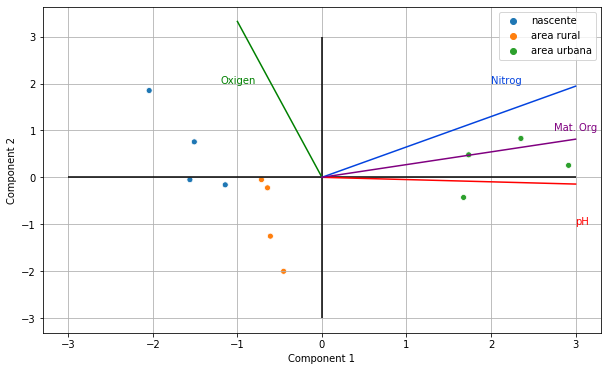

In [20]:
#projetar valores da matriz df
#escolhí o 1º e 4º autovetor da lista (possuem maior autovalores)

valoresprojetarX=df.dot(autovetores.T[0])

valoresprojetarY=df.dot(autovetores.T[3])


plt.figure(figsize=(10,6))
sns.scatterplot(valoresprojetarX,valoresprojetarY,hue=Local)


plt.grid()
plt.vlines(0,-3,3)
plt.hlines(0,-3,3)
           
#plotar retas das variáveis no gráfico           
#oxigen
xO=np.linspace(-1,0,20)

valueOXIG=datavetor.iloc[1,2]/datavetor.iloc[0,2]
plt.plot(xO,(valueOXIG*xO),c='g')
#pH
xP=np.linspace(0,3,20)

valuepH=datavetor.iloc[1,0]/datavetor.iloc[0,0]
plt.plot(xP,(valuepH*xP),c='r')

#N
valueN=datavetor.iloc[1,1]/datavetor.iloc[0,1]
plt.plot(xP,(valueN*xP),c='#0343DF')

#Materia Org
valueM=datavetor.iloc[1,3]/datavetor.iloc[0,3]
plt.plot(xP,(valueM*xP),c='purple')

plt.text(-1.2, 2, 'Oxigen',c='green')
plt.text(2, 2, 'Nitrog',c='#0343DF')
plt.text(2.75, 1, 'Mat. Org',c='purple')
plt.text(3, -1, 'pH',c='r')

plt.xlabel('Component 1')
plt.ylabel('Component 2')

<h1>LOADINGS MATRIX OU MATRIZ DE CORRELAÇÕES ENTRE COMPONENTES PRINCIPAIS E VARIÁVEIS<h1>

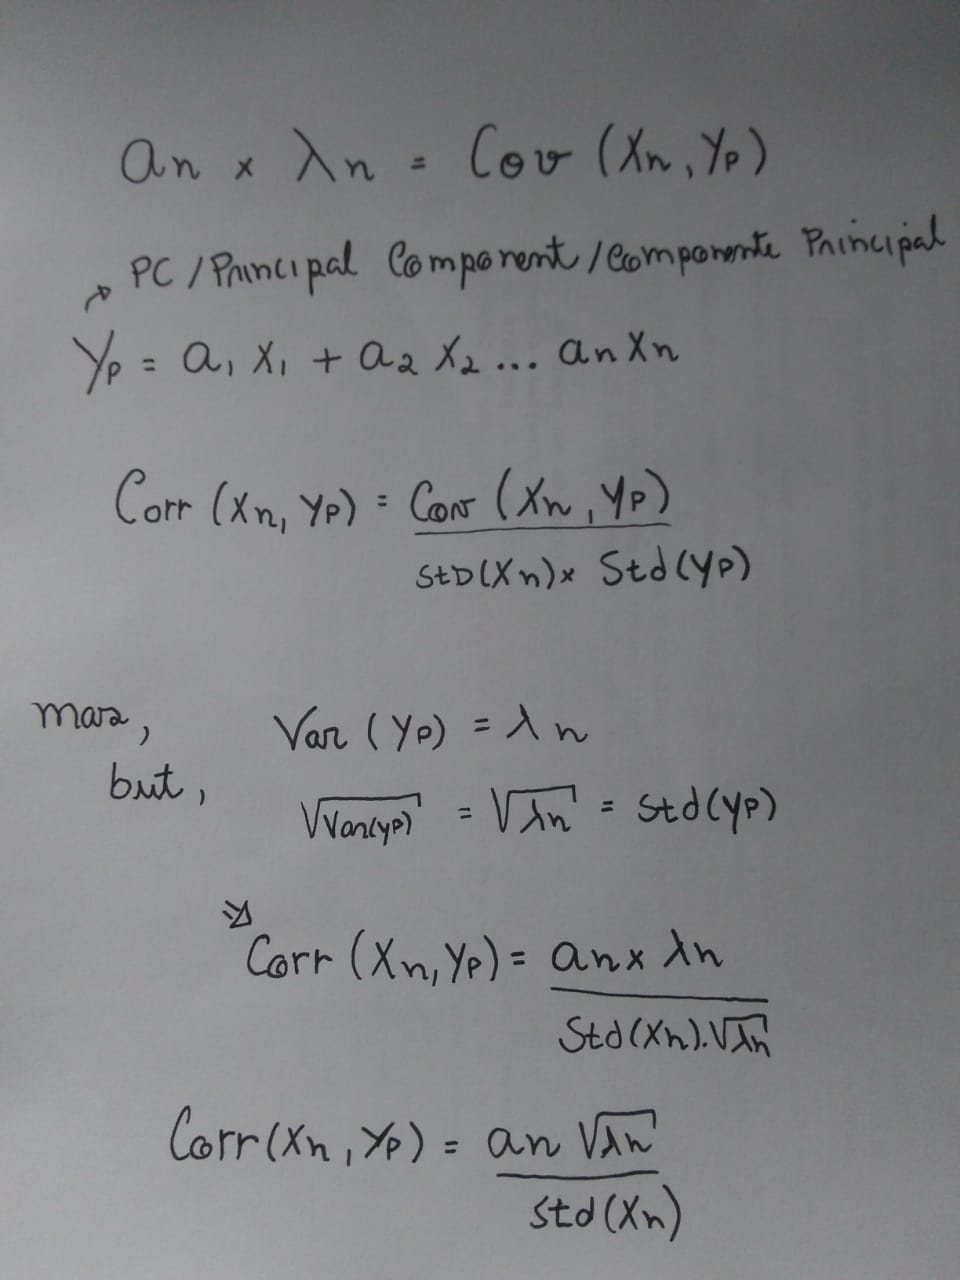

In [21]:
Image(r'C:\Users\joaov\OneDrive\Documentos\Material Estatística\Principal Componente Análise\PCA-PARA-APL\corr.jpeg')

<h3>AUTOVETORES<h3>

In [22]:
df1=datavetor.iloc[:-2,:-3]
df1=df1.T
df1

,componente1,componente4
pH,0.552160,-0.026494
N,0.528118,0.342179
Oxigen,-0.278549,0.925910
MatOrg,0.581911,0.157806


<h3>Transformando para adquirir cargas/ Divisão pela desvio padrao <h3>

In [23]:
df1['componente1']=df1['componente1']*np.sqrt(2.870409)  #Multiplicando pelo autovalor correspondente à componente principal 1
df1['componente4']=df1['componente4']*np.sqrt(0.985478)  #Multiplicando pelo autovalor correspondente à componente principal 4

In [24]:
valor=np.sqrt(1.09090909)        #Desvio padrao/Diagonal da matriz de covariância (se normalizada, a diagonal é igual)
df1['componente1']=df1['componente1']/(valor)  
df1['componente4']=df1['componente4']/(valor)

<h2>MATRIZ DE CORRELAÇÃO<h2>

In [25]:
df1

,componente1,componente4
pH,0.895658,-0.025181
N,0.856661,0.325224
Oxigen,-0.451835,0.880031
MatOrg,0.943919,0.149986


In [26]:
projetados=pd.DataFrame(columns=['componente1','componente4'])
projetados['componente1']=valoresprojetarX
projetados['componente4']=valoresprojetarY
projetados

,componente1,componente4
0,-1.143706,-0.160112
1,-1.561887,-0.049331
2,-1.509676,0.756296
3,-2.043419,1.851392
4,-0.643925,-0.224054
5,-0.609963,-1.255209
6,-0.715546,-0.049979
7,-0.453501,-2.004246
8,2.917174,0.255294
9,2.353445,0.829121


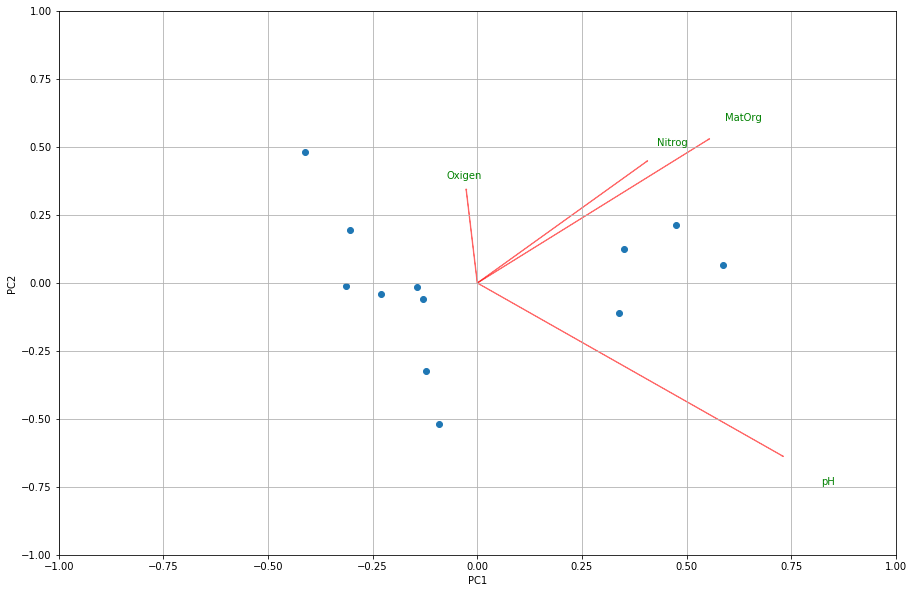

In [34]:
def biplot(score,coeff,labels=None):
    xs = score.iloc[:,0]
    ys = score.iloc[:,1]
    n=coeff.shape[0]
    scalex = 1/(xs.max()- xs.min())
    scaley = 1/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color='r',alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
 
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    
 
# test
plt.figure(figsize=(15,10))
biplot(projetados,autovetores.T,['MatOrg','Nitrog','pH','Oxigen'])

<h1>*INFORMAÇÕES SOBRE PCA*<h1>
<h3>consulte slides em pdf no repositório<h3>